In [3]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [1]:

import pandas as pd
import numpy as np 
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt

C:\Users\taniy\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df= pd.read_csv(r"C:\Users\taniy\OneDrive\Desktop\clg\Prodigy\Data Science\twitter_training.csv")
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
df = pd.read_csv(r"C:\Users\taniy\OneDrive\Desktop\clg\Prodigy\Data Science\twitter_training.csv", names=col_names)
df.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [5]:
df.dropna(subset = ['Content'],inplace=True)

In [6]:
total_duplicates = df[df.duplicated(keep='first')].shape[0]

print("Total duplicate rows:", total_duplicates)

Total duplicate rows: 2340


In [7]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

In [8]:
df['Sentiment'] = df['Sentiment'].replace('Irrelevant', 'Neutral')

In [9]:
df.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

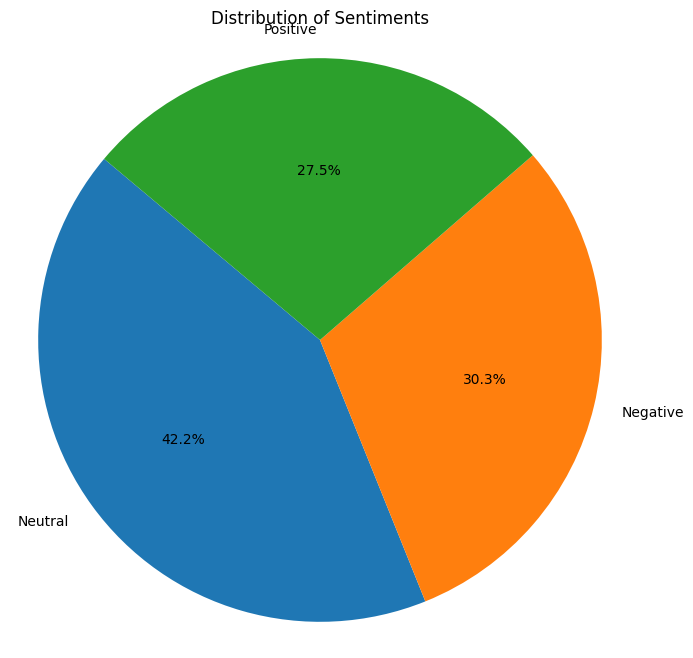

In [10]:
sentiment_distribution = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments')
plt.axis('equal') 

plt.show()

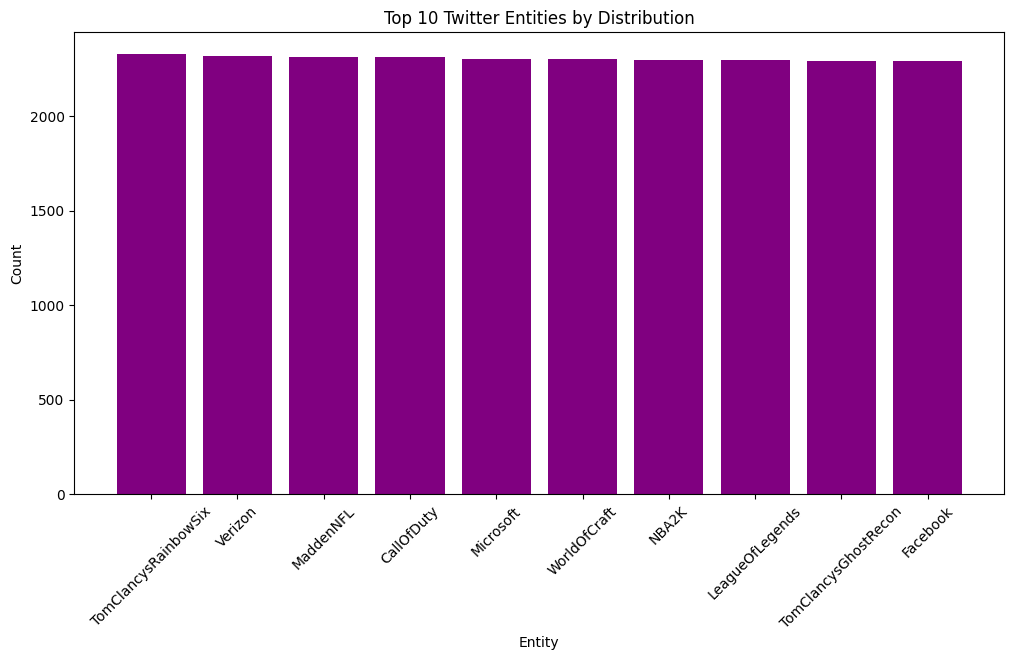

In [11]:
entity_distribution = df['Entity'].value_counts()
top_10_entities = entity_distribution.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_entities.index, top_10_entities.values, color='purple')
plt.title('Top 10 Twitter Entities by Distribution')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

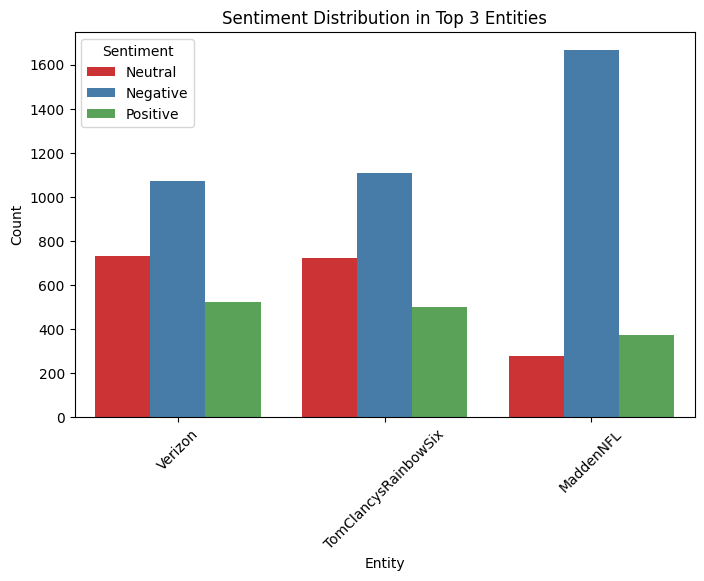

In [12]:
entity_distribution = df['Entity'].value_counts()
top_3_entities = entity_distribution.head(3).index
df_top_3 = df[df['Entity'].isin(top_3_entities)]
plt.figure(figsize=(8, 5))
sns.countplot(data=df_top_3, x='Entity', hue='Sentiment', palette='Set1')
plt.title('Sentiment Distribution in Top 3 Entities')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

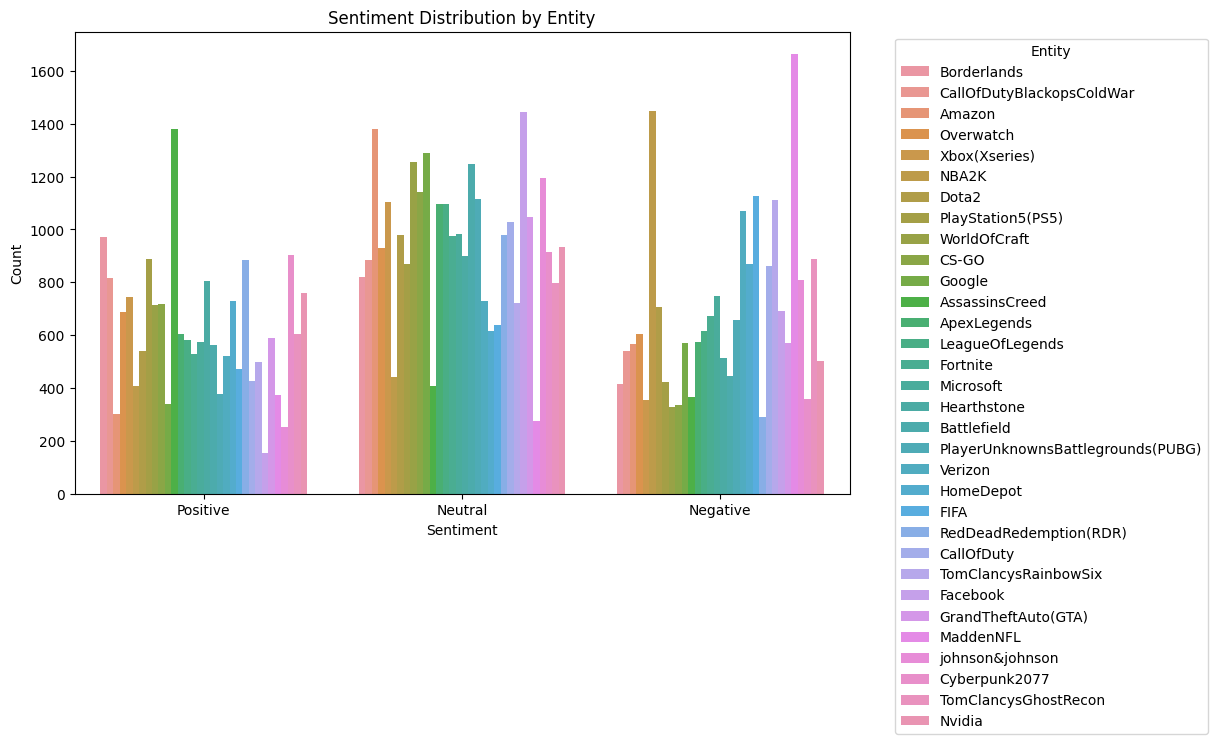

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', hue='Entity')
plt.title("Sentiment Distribution by Entity")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend(title='Entity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [14]:
sentiment_counts = df.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)
sentiment_counts

Sentiment,Negative,Neutral,Positive
Entity,,,
Amazon,565,1382,302
ApexLegends,574,1098,606
AssassinsCreed,365,409,1382
Battlefield,445,1249,561
Borderlands,415,819,972
CS-GO,335,1143,717
CallOfDuty,861,1027,426
CallOfDutyBlackopsColdWar,540,885,817
Cyberpunk2077,360,913,902


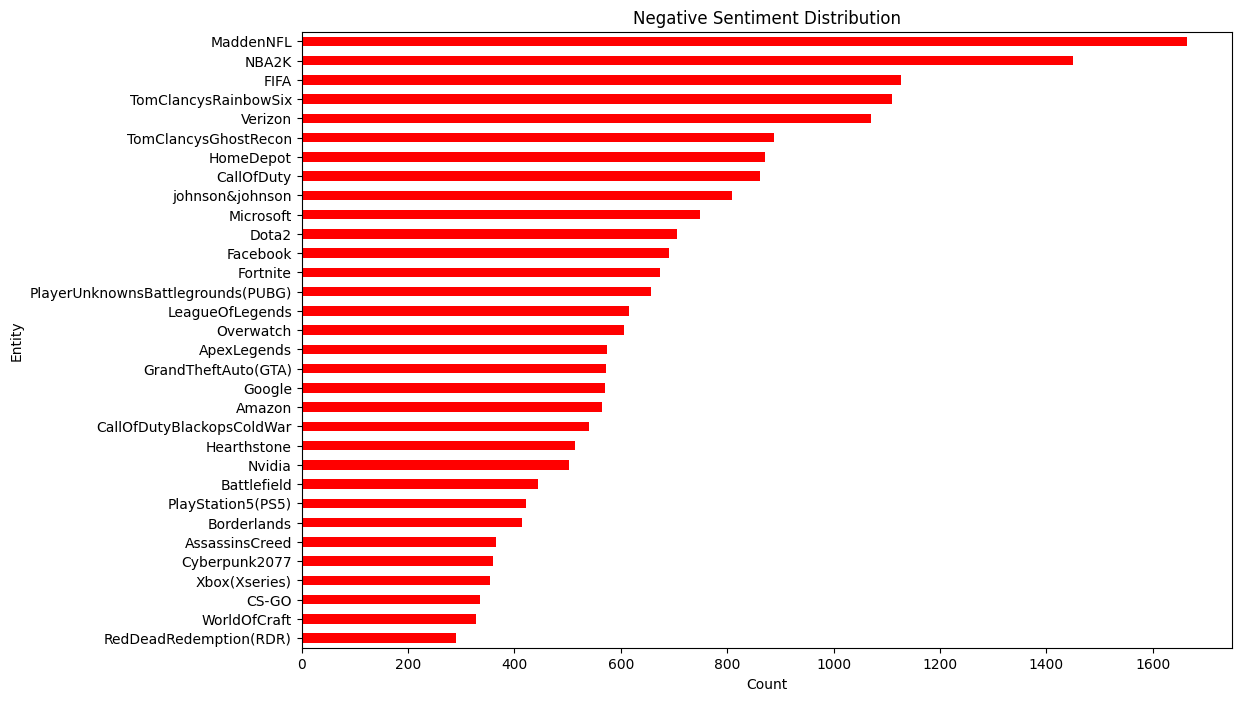

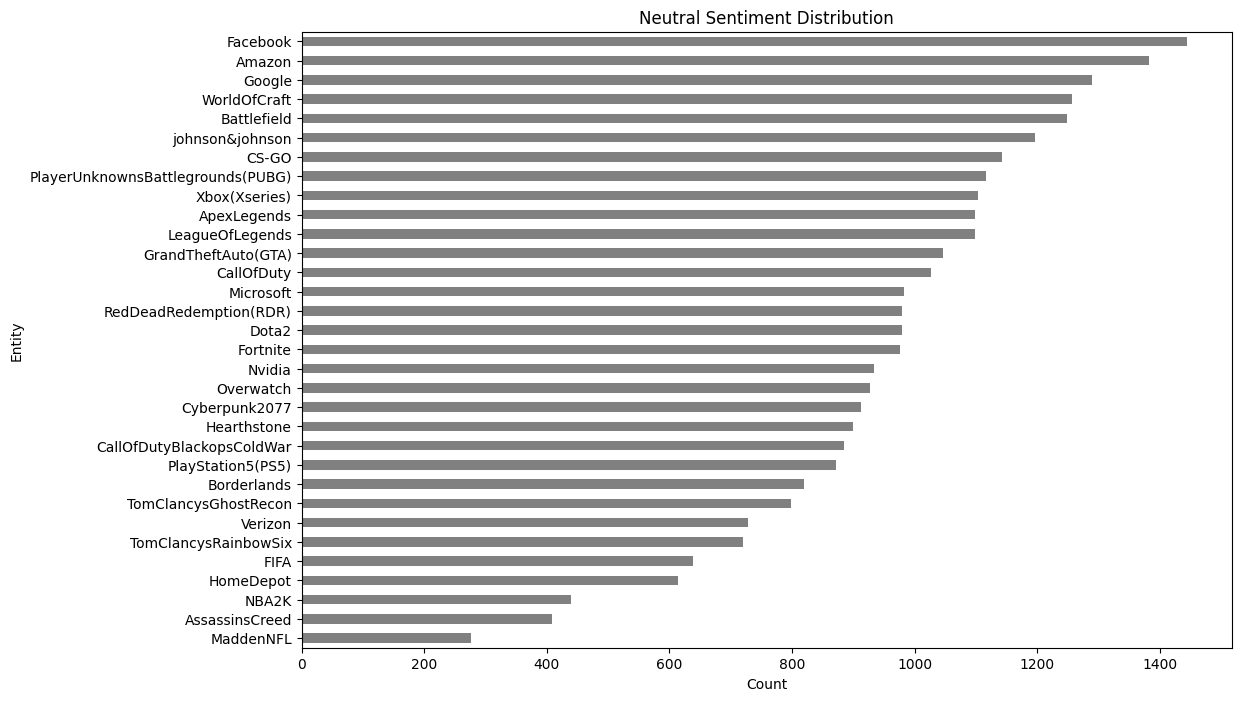

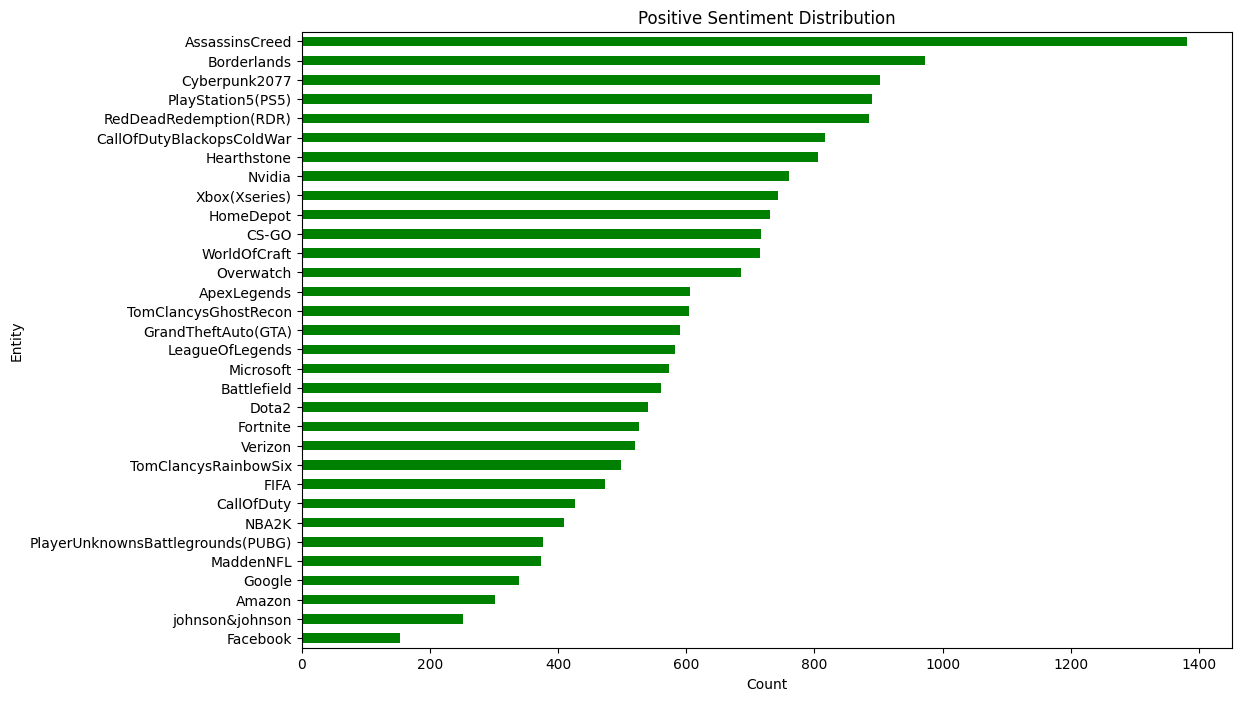

In [15]:
for sentiment in ['Negative', 'Neutral', 'Positive']:
    plt.figure(figsize=(12, 8))
    sentiment_counts[sentiment].sort_values().plot(kind='barh', color={'Negative': 'red', 'Neutral': 'gray', 'Positive': 'green'}[sentiment])
    plt.title(f'{sentiment} Sentiment Distribution')
    plt.xlabel('Count')
    plt.ylabel('Entity')
    plt.show()

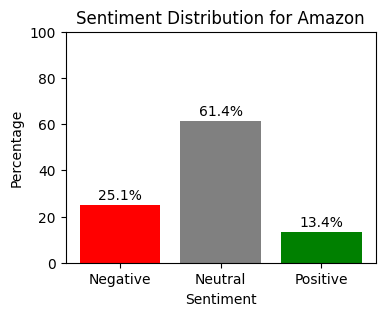

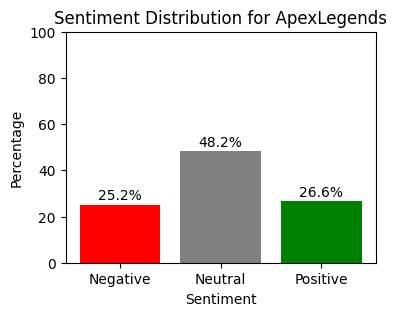

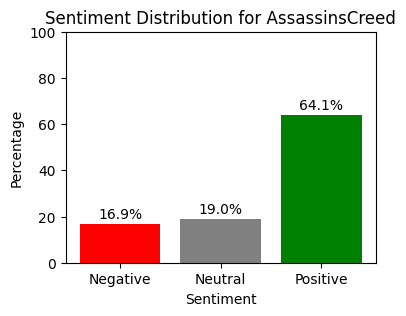

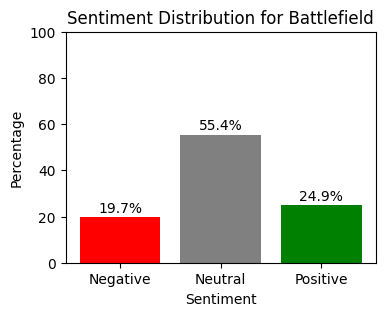

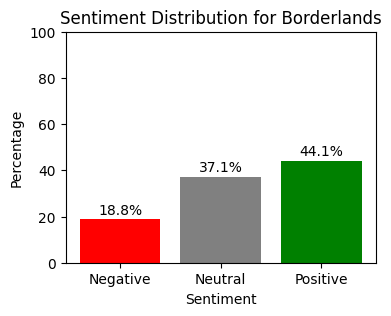

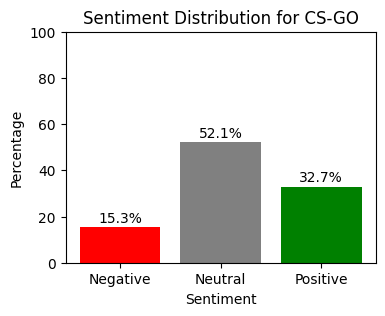

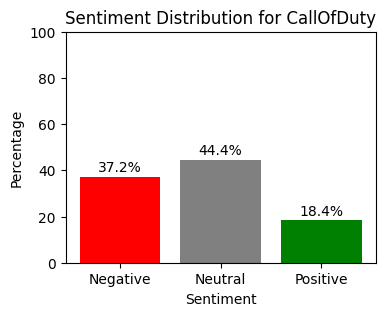

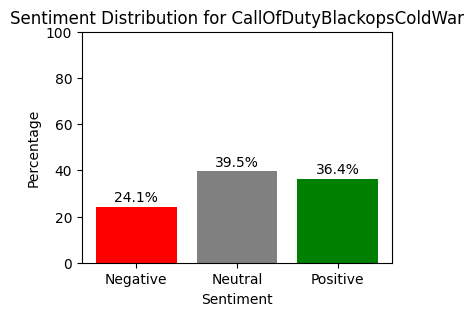

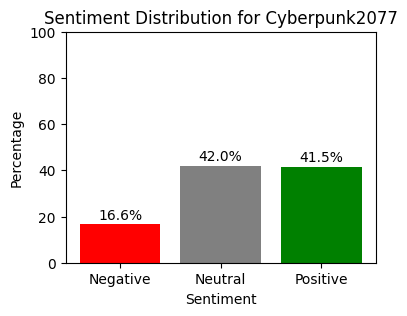

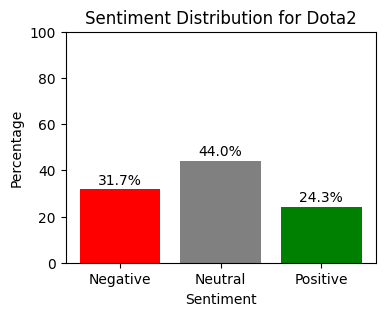

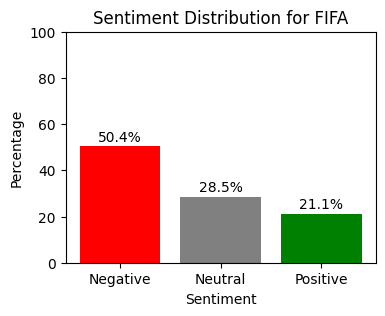

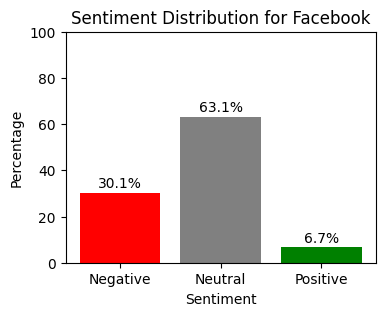

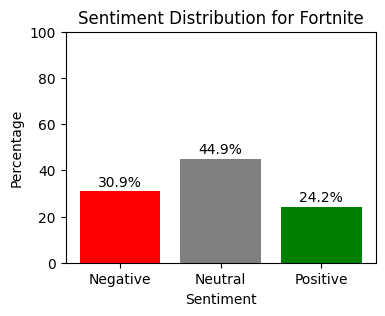

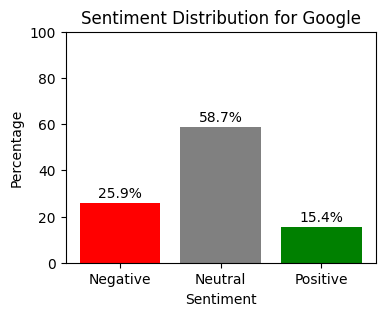

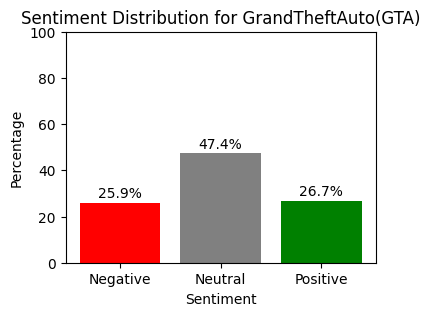

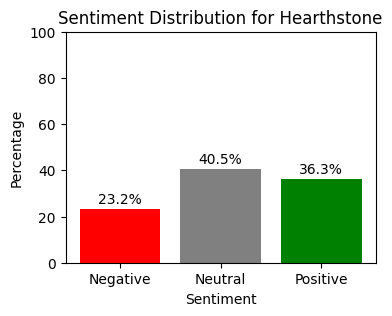

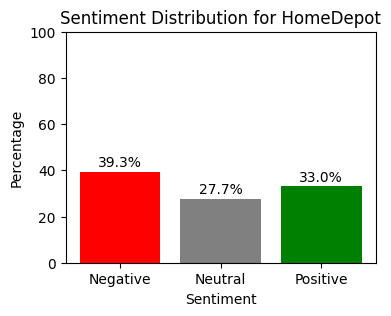

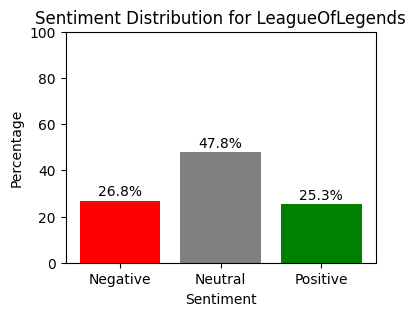

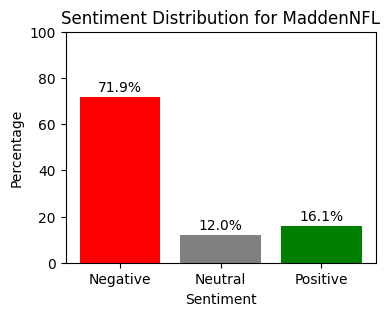

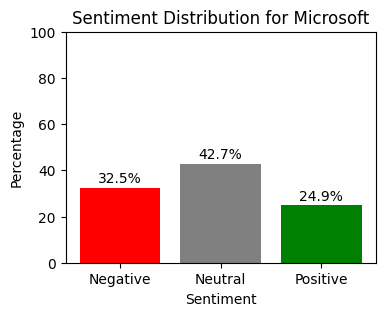

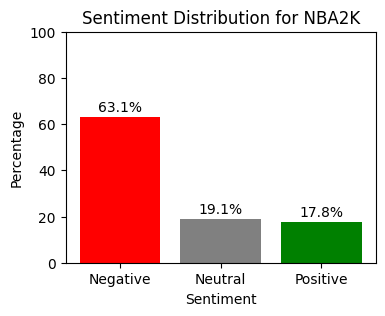

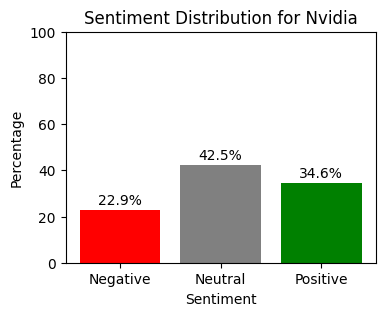

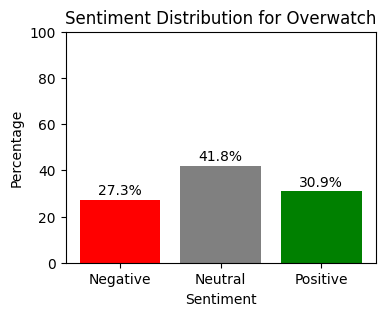

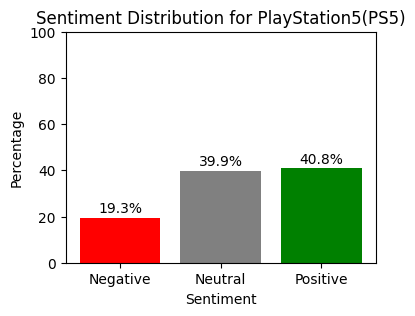

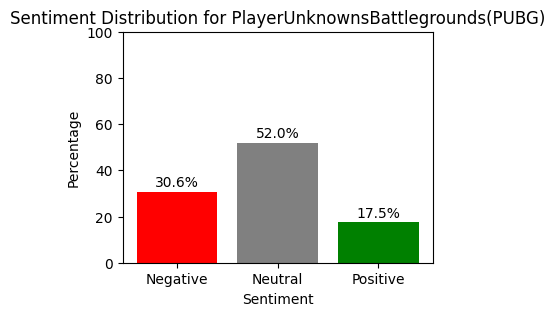

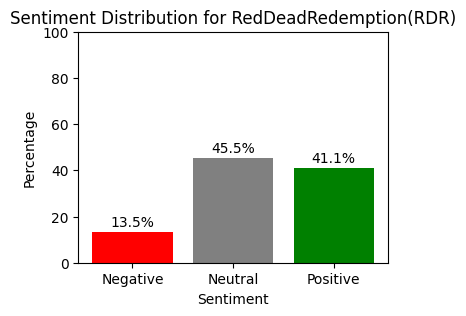

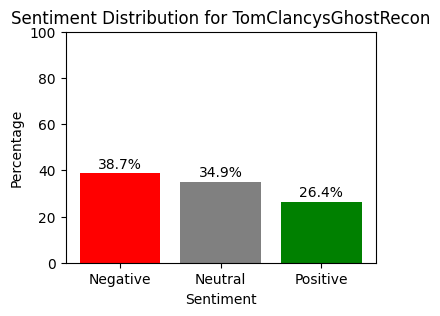

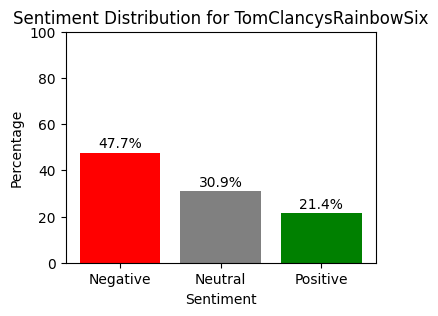

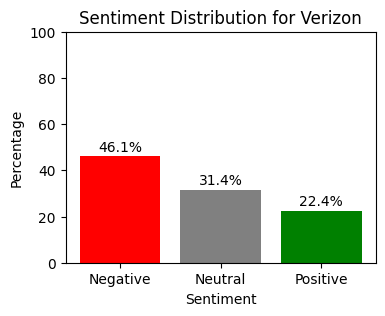

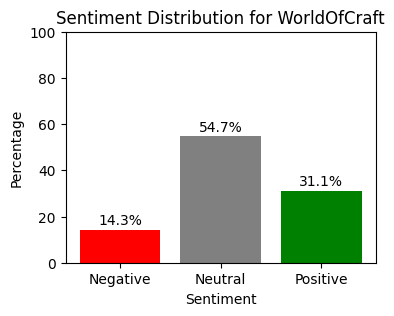

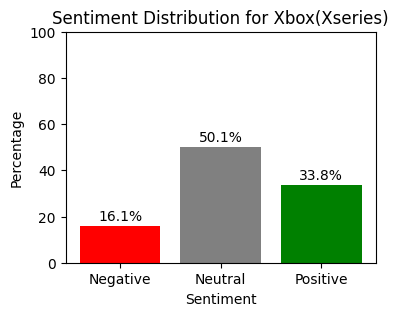

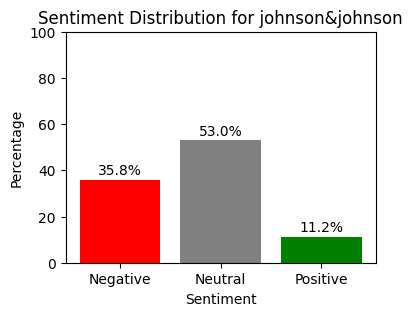

In [17]:
totals = sentiment_counts.sum(axis=1)
percentages = (sentiment_counts.divide(totals, axis=0) * 100).round(1)

for entity, row in percentages.iterrows():
    plt.figure(figsize=(4,3))

    bars = plt.bar(row.index, row, color=['red', 'gray', 'green'])
    plt.title(f'Sentiment Distribution for {entity}')
    plt.xlabel('Sentiment')
    plt.ylabel('Percentage')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

    plt.ylim(0, 100)  
    plt.show()